In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from pathlib import Path
from io import StringIO

custom_params = {"axes.spines.right": False, "axes.spines.top": False}

basedir = Path("../analysis/soft_clipped")

sns.set_theme(
    context="notebook",
    style="ticks", 
    palette="colorblind",
    font_scale=1.1,
    rc=custom_params
)

# For SVG output
plt.rcParams['svg.fonttype'] = 'none'
figdir = Path("../figures/svg")


## Load overlap data

In [2]:
df = pd.read_csv(basedir / "stats.tsv", sep="\t")
df["Any strand"] = df["Intersect fract"] * 100
df["Opposite strand"] = df["Intersect DS fract"] * 100
df["Same strand"] = df["Intersect SS fract"] * 100

names = {
    "all.diff": "AVITI",
    "all.no_xplus.diff": "AVITI - NovaSeqX+",
}
df["Name"] = df["File"].replace(names)
df = df.query("File in @names.keys()")

# Melt the DataFrame to long format for easier plotting
df = df.melt(id_vars=["Name"], value_vars=["Any strand", "Same strand", "Opposite strand"],
                    var_name="Type", value_name="percent")
df

,Name,Type,percent
0,AVITI,Any strand,69.0
1,AVITI - NovaSeqX+,Any strand,92.0
2,AVITI,Same strand,4.0
3,AVITI - NovaSeqX+,Same strand,5.0
4,AVITI,Opposite strand,68.0
5,AVITI - NovaSeqX+,Opposite strand,91.0


## Plot barplot

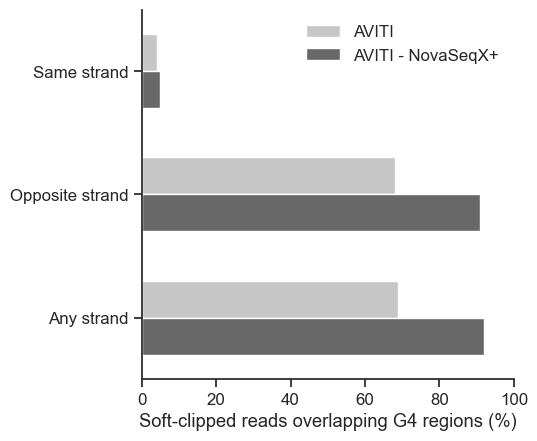

In [3]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
ax = sns.barplot(
    data=df,
    y="Type",
    x="percent",
    hue="Name",
    palette="Greys",
    width=0.6,
    order=["Same strand", "Opposite strand", "Any strand"],
)
ax.set_xlabel("Soft-clipped reads overlapping G4 regions (%)")
ax.set_ylabel("")
ax.set_xlim(0, 100)
ax.legend(title="", loc="upper right", bbox_to_anchor=(1, 1), frameon=False)
# Save figures
plt.savefig(figdir / "g4_overlap.svg", bbox_inches="tight", dpi=300)
